# Data Pre-processsing

In [ ]:
!pip install rouge_score evaluate bert_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.9 MB/s eta 0:00:00
  C

In [ ]:
from evaluate import load
from sentence_transformers import SentenceTransformer, util
import numpy as np

from datasets import load_metric
import evaluate
import torch
import bert_score

import pandas as pd

from transformers import AutoModelForCausalLM, AutoTokenizer

from google.colab import drive

import matplotlib.pyplot as plt

from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling
import time
import torch

from peft import LoraConfig, get_peft_model, TaskType
from huggingface_hub import login

from datasets import Dataset
from datasets import load_dataset


In [ ]:
import pandas as pd

df = pd.read_excel("/content/WebScarpedDataset_for_DeepSeekchatbot_training.xlsx")

df = df.dropna().reset_index(drop=True)

df.head()


,Source URL,Question,Answer
0,https://aws.amazon.com/amazon-mq/faqs/,Can I change the default broke configurations ...,"Yes, Amazon MQ allows you to create custom con..."
1,https://aws.amazon.com/amazon-mq/faqs/,Do I need to provision and pay for broker boot...,"No, each broker you provision includes boot vo..."
2,https://aws.amazon.com/amazon-mq/faqs/,Do I pay for inter-node data transfer on Amazo...,"No, all inter-node data transfer is included w..."
3,https://aws.amazon.com/amazon-mq/faqs/,Does Amazon MQ offer Reserved Instance pricing?,"No, Amazon MQ does not offer reserved instance..."
4,https://aws.amazon.com/amazon-mq/faqs/,How am I charged for Amazon MQ?,"With Amazon MQ, you pay only for what you use...."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7255 entries, 0 to 7254
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Source URL  7255 non-null   object
 1   Question    7255 non-null   object
 2   Answer      7255 non-null   object
dtypes: object(3)
memory usage: 170.2+ KB


In [ ]:
df.describe()

,Source URL,Question,Answer
count,7255,7255,7255
unique,108,7103,7173
top,https://aws.amazon.com/ec2/faqs/,Do your prices include taxes?,Yes.
freq,526,8,11


In [ ]:
print(df.isnull().sum())


Source URL    0
Question      0
Answer        0
dtype: int64


In [ ]:
print(df.duplicated(subset=["Question"]).sum())
print(df.duplicated(subset=["Answer"]).sum())

152
82


In [ ]:
print(df.duplicated().sum())

25


In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]

print(f"🔁 Found {len(duplicate_rows)} fully duplicated rows:")
print(duplicate_rows)


🔁 Found 50 fully duplicated rows:
                                      Source URL  \
2210            https://aws.amazon.com/ebs/faqs/   
2211            https://aws.amazon.com/ebs/faqs/   
2214            https://aws.amazon.com/ebs/faqs/   
2215            https://aws.amazon.com/ebs/faqs/   
2228            https://aws.amazon.com/ebs/faqs/   
2229            https://aws.amazon.com/ebs/faqs/   
2230            https://aws.amazon.com/ebs/faqs/   
2231            https://aws.amazon.com/ebs/faqs/   
2232            https://aws.amazon.com/ebs/faqs/   
2233            https://aws.amazon.com/ebs/faqs/   
2234            https://aws.amazon.com/ebs/faqs/   
2235            https://aws.amazon.com/ebs/faqs/   
2240            https://aws.amazon.com/ebs/faqs/   
2241            https://aws.amazon.com/ebs/faqs/   
2244            https://aws.amazon.com/ebs/faqs/   
2245            https://aws.amazon.com/ebs/faqs/   
2248            https://aws.amazon.com/ebs/faqs/   
2249            https://aws.am

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

display(duplicate_rows)


,Source URL,Question,Answer
2210,https://aws.amazon.com/ebs/faqs/,Are EBS Standard Volumes still available?,EBS Standard Volumes have been renamed to EBS Magnetic volumes. Any existing volumes will not have been changed as a result of this and there are no functional differences in the EBS Magnetic offering compared to EBS Standard. The name of this offering was changed to avoid confusion with our General Purpose SSD (gp2) volume type which is our recommended default volume type.
2211,https://aws.amazon.com/ebs/faqs/,Are EBS Standard Volumes still available?,EBS Standard Volumes have been renamed to EBS Magnetic volumes. Any existing volumes will not have been changed as a result of this and there are no functional differences in the EBS Magnetic offering compared to EBS Standard. The name of this offering was changed to avoid confusion with our General Purpose SSD (gp2) volume type which is our recommended default volume type.
2214,https://aws.amazon.com/ebs/faqs/,Are snapshots versioned? Can I read an older snapshot to do a point-in-time recovery?,"Each snapshot is given a unique identifier, and customers can create volumes based on any of their existing snapshots."
2215,https://aws.amazon.com/ebs/faqs/,Are snapshots versioned? Can I read an older snapshot to do a point-in-time recovery?,"Each snapshot is given a unique identifier, and customers can create volumes based on any of their existing snapshots."
2228,https://aws.amazon.com/ebs/faqs/,Can I stripe multiple volumes together to get better performance?,"Yes. You can stripe multiple volumes together to achieve up to 400,000 IOPS or 12,500 Mbps when attached to larger EC2 instances. We recommend using io2 Block Express volumes for higher performance requirements without needing the operational management of striping multiple volumes. Performance for st1 and sc1 scales linearly with volume size so there may not be as much of a benefit to stripe these volumes together."
2229,https://aws.amazon.com/ebs/faqs/,Can I stripe multiple volumes together to get better performance?,"Yes. You can stripe multiple volumes together to achieve up to 400,000 IOPS or 12,500 Mbps when attached to larger EC2 instances. We recommend using io2 Block Express volumes for higher performance requirements without needing the operational management of striping multiple volumes. Performance for st1 and sc1 scales linearly with volume size so there may not be as much of a benefit to stripe these volumes together."
2230,https://aws.amazon.com/ebs/faqs/,Can my application use Multi-Attach?,"Your application can use Multi-Attach if the application is built on Windows Server Failover Cluster, coordinates safe access to shared storage using NVMe reservations, or coordinates safe access at the application-level."
2231,https://aws.amazon.com/ebs/faqs/,Can my application use Multi-Attach?,"Your application can use Multi-Attach if the application is built on Windows Server Failover Cluster, coordinates safe access to shared storage using NVMe reservations, or coordinates safe access at the application-level."
2232,https://aws.amazon.com/ebs/faqs/,Do General Purpose SSD (gp3) volumes have burst?,"No. All General Purpose SSD (gp3) volumes include 3,000 IOPS and 125 MB/s of consistent performance at no additional cost. Volumes can sustain the full 3,000 IOPS and 125 MB/s indefinitely."
2233,https://aws.amazon.com/ebs/faqs/,Do General Purpose SSD (gp3) volumes have burst?,"No. All General Purpose SSD (gp3) volumes include 3,000 IOPS and 125 MB/s of consistent performance at no additional cost. Volumes can sustain the full 3,000 IOPS and 125 MB/s indefinitely."


In [ ]:
len(duplicate_rows)

50

In [ ]:
pd.reset_option('display.max_colwidth')
df.head()

,Source URL,Question,Answer
0,https://aws.amazon.com/amazon-mq/faqs/,Can I change the default broke configurations ...,"Yes, Amazon MQ allows you to create custom con..."
1,https://aws.amazon.com/amazon-mq/faqs/,Do I need to provision and pay for broker boot...,"No, each broker you provision includes boot vo..."
2,https://aws.amazon.com/amazon-mq/faqs/,Do I pay for inter-node data transfer on Amazo...,"No, all inter-node data transfer is included w..."
3,https://aws.amazon.com/amazon-mq/faqs/,Does Amazon MQ offer Reserved Instance pricing?,"No, Amazon MQ does not offer reserved instance..."
4,https://aws.amazon.com/amazon-mq/faqs/,How am I charged for Amazon MQ?,"With Amazon MQ, you pay only for what you use...."


In [ ]:
df.shape

(7255, 3)

In [ ]:
# Droping fully duplicated rows, keeping the first occurrence
data_unique = df.drop_duplicates(keep='first').reset_index(drop=True)

print(f"✅ Removed {len(df) - len(data_unique)} duplicate rows.")


✅ Removed 25 duplicate rows.


In [ ]:
data_unique.shape

(7230, 3)

# Data Pre-processing

In [ ]:
import json

samples = []

for _, row in df.iterrows():
  samples.append({
      "instruction": "FAQ",
      "input": row['Question'],
      "output": f"{row['Answer']} [Source: {row['Source URL']}]"
  })

output_jsonl_path = "/content/aws_faq_instruction_dataset.jsonl"
with open(output_jsonl_path, "w") as f:
    for sample in samples:
        f.write(json.dumps(sample) + "\n")


In [ ]:
print(samples[0])

{'instruction': 'FAQ', 'input': 'Can I change the default broke configurations or upload a new configuration to Amazon MQ?', 'output': 'Yes, Amazon MQ allows you to create custom configurations and apply them to new and existing clusters. For more information on custom configurations, see theconfiguration documentation. (https://docs.aws.amazon.com/amazon-mq/latest/developer-guide/managing-broker-configurations.html) [Source: https://aws.amazon.com/amazon-mq/faqs/]'}


In [ ]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

source_counts = df['Source URL'].value_counts()

# Keeping only those with at least 2 samples
valid_sources = source_counts[source_counts >= 2].index
df_filtered = df[df['Source URL'].isin(valid_sources)].reset_index(drop=True)

# stratified split
train_df, temp_df = train_test_split(df_filtered, test_size=0.2, stratify=df_filtered['Source URL'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

def format_for_dataset(row):
    return {
        "instruction": "FAQ",
        "input": row['Question'],
        "output": f"{row['Answer']} [Source: {row['Source URL']}]"
    }

train_df = train_df.apply(format_for_dataset, axis=1).apply(pd.Series)
val_df = val_df.apply(format_for_dataset, axis=1).apply(pd.Series)
test_df = test_df.apply(format_for_dataset, axis=1).apply(pd.Series)


train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer
from datasets import load_dataset
from transformers import AutoModelForCausalLM


In [ ]:
train_dataset[0]

{'instruction': 'FAQ',
 'input': 'Q: Does Amazon SNS support HTTP/2 for mobile push notification to APNS endpoints?',
 'output': 'Amazon SNS uses HTTP/2 with p12 certificates for sending push notifications via Apple Push Notification Service (APNS) to iOS and macOS endpoints. [Source: https://aws.amazon.com/sns/faqs/]',
 '__index_level_0__': 6081}

In [ ]:
print(train_dataset[:5])

{'instruction': ['FAQ', 'FAQ', 'FAQ', 'FAQ', 'FAQ'], 'input': ['Q: Does Amazon SNS support HTTP/2 for mobile push notification to APNS endpoints?', 'Q: Will vCPU limits be available in all Regions?', 'Q: Can I use Amazon SES to send email from my existing applications?', 'Q: Why are there 2 protocols available when I choose my WorkSpaces Personal bundle?', 'Q. How am I charged if Spot price changes while my instance is running?'], 'output': ['Amazon SNS uses HTTP/2 with p12 certificates for sending push notifications via Apple Push Notification Service (APNS) to iOS and macOS endpoints. [Source: https://aws.amazon.com/sns/faqs/]', 'vCPU-based instance limits are available in all commercial AWS Regions. [Source: https://aws.amazon.com/ec2/faqs/]', 'Amazon SES allows you to create a private SMTP relay for use with any existing SMTP client software, including software that you develop yourself, or any third-party software that can send email using the SMTP protocol. \nFor more information

In [ ]:
train_dataset[:2]

{'instruction': ['FAQ', 'FAQ'],
 'input': ['Q: Does Amazon SNS support HTTP/2 for mobile push notification to APNS endpoints?',
  'Q: Will vCPU limits be available in all Regions?'],
 'output': ['Amazon SNS uses HTTP/2 with p12 certificates for sending push notifications via Apple Push Notification Service (APNS) to iOS and macOS endpoints. [Source: https://aws.amazon.com/sns/faqs/]',
  'vCPU-based instance limits are available in all commercial AWS Regions. [Source: https://aws.amazon.com/ec2/faqs/]'],
 '__index_level_0__': [6081, 2819]}

In [ ]:

for sample in train_dataset.select(range(2)):
    print(sample)


{'instruction': 'FAQ', 'input': 'Q: Does Amazon SNS support HTTP/2 for mobile push notification to APNS endpoints?', 'output': 'Amazon SNS uses HTTP/2 with p12 certificates for sending push notifications via Apple Push Notification Service (APNS) to iOS and macOS endpoints. [Source: https://aws.amazon.com/sns/faqs/]', '__index_level_0__': 6081}
{'instruction': 'FAQ', 'input': 'Q: Will vCPU limits be available in all Regions?', 'output': 'vCPU-based instance limits are available in all commercial AWS Regions. [Source: https://aws.amazon.com/ec2/faqs/]', '__index_level_0__': 2819}


In [ ]:
print(f"Size of training set: {len(train_dataset)}")
print(f"Size of test set: {len(eval_dataset)}")
print(f"Size of test set: {len(test_dataset)}")


Size of training set: 5801
Size of test set: 725
Size of test set: 726


# Modeling

In [ ]:
model_id = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"

tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype="auto", device_map="auto")


def tokenize(example):
    prompt = f"{example['instruction']}\nInput: {example['input']}\nOutput:"
    target = example['output']
    return tokenizer(
        prompt,
        text_target=target,
        truncation=True,
        padding="max_length",
        max_length=512,
    )

tokenized_train_dataset = train_dataset.map(
    tokenize,
    batched=False,
    remove_columns=train_dataset.column_names)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Map:   0%|          | 0/5801 [00:00<?, ? examples/s]

In [ ]:
tokenized_eval_dataset = eval_dataset.map(
    tokenize,
    batched=False,
    remove_columns=eval_dataset.column_names)


Map:   0%|          | 0/725 [00:00<?, ? examples/s]

In [ ]:
# Print the DatasetDict object to see the splits
print(tokenized_dataset)
print(tokenized_dataset.keys())
# Sample from the 'train' split
print(tokenized_dataset["train"][:2])

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6531
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 726
    })
})
dict_keys(['train', 'test'])
{'input_ids': [[151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 1516

In [ ]:
print(tokenized_train_dataset)

print(tokenized_train_dataset[:2])

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 5801
})
{'input_ids': [[151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643, 151643,

In [ ]:
print(tokenized_eval_dataset)


Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 725
})


In [ ]:
tokenized_test_dataset = test_dataset.map(
    tokenize,
    batched=False,
    remove_columns=eval_dataset.column_names)



Map:   0%|          | 0/726 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling
import time
import torch


training_args = TrainingArguments(
    output_dir="/content/deepseek_aws_faq_model",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    num_train_epochs=2,
    eval_strategy="steps",
    eval_steps=10,
    logging_strategy="steps",
    logging_steps=10,
    learning_rate=2e-4,
    fp16=False,
    save_strategy="steps",
    save_steps=100,
    save_total_limit=2,
    push_to_hub=False,
    report_to="none",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False

)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_eval_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Start time
start_time = time.time()

# Track initial memory (if using GPU)
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    start_mem = torch.cuda.memory_allocated()
else:
    start_mem = 0

trainer.train()

# End time
end_time = time.time()

# Compute memory used
if torch.cuda.is_available():
    peak_mem = torch.cuda.max_memory_allocated()
    used_mem_MB = (peak_mem - start_mem) / (1024 ** 2)
else:
    used_mem_MB = 0

/tmp/ipython-input-33-487900143.py:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.16 GiB. GPU 0 has a total capacity of 22.16 GiB of which 831.38 MiB is free. Process 9858 has 21.34 GiB memory in use. Of the allocated memory 20.29 GiB is allocated by PyTorch, and 837.66 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

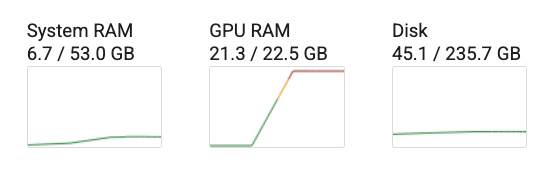